Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

# Описание данных

*Таблица airports* — информация об аэропортах:  
airport_code — трёхбуквенный код аэропорта  
airport_name — название аэропорта  
city — город  
timezone — временная зона    

*Таблица aircrafts* — информация о самолётах:  
aircraft_code — код модели самолёта  
model — модель самолёта  
range — дальность полёта    

*Таблица tickets* — информация о билетах:  
ticket_no — уникальный номер билета  
passenger_id — персональный идентификатор пассажира  
passenger_name — имя и фамилия пассажира    

*Таблица flights* — информация о рейсах:  
flight_id — уникальный идентификатор рейса  
departure_airport — аэропорт вылета  
departure_time — дата и время вылета  
arrival_airport — аэропорт прилёта  
arrival_time — дата и время прилёта  
aircraft_code — id самолёта  
Таблица ticket_flights — стыковая таблица «рейсы-билеты»  
ticket_no — номер билета  
flight_id — идентификатор рейса  
Таблица festivals — информация о фестивалях  
festival_id — уникальный номер фестиваля  
festival_date — дата проведения фестиваля  
festival_city — город проведения фестиваля  
festival_name — название фестиваля  

<img src="sql_img.jpg">

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Запрос 1

Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:  
model  
flights_amount  

*SQL query:*
```sql
SELECT 
    aircrafts.model,
    COUNT(*)
FROM
    aircrafts
    INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code
WHERE
     CAST(flights.departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    aircrafts.model
```

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.head(3)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630


In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


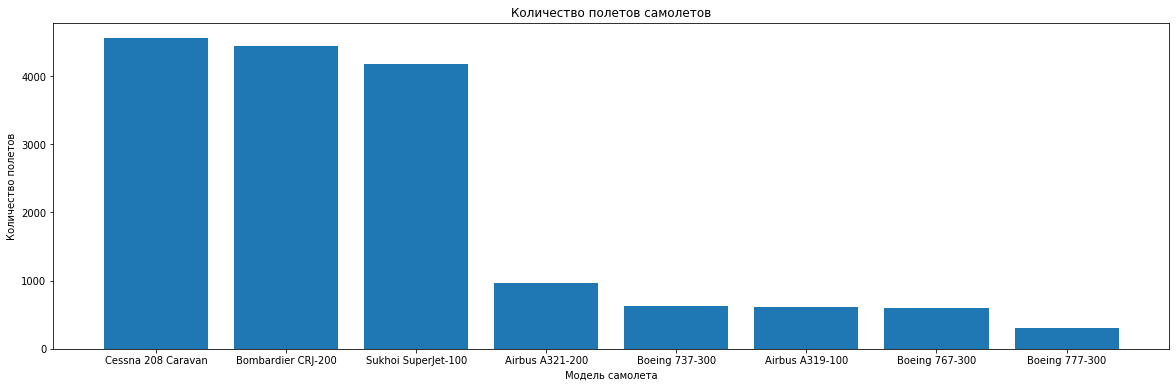

In [5]:
query_1 = query_1.sort_values(by='flights_amount', ascending=False)
plt.figure(figsize=(20,6))
plt.bar(query_1.model, query_1.flights_amount)
plt.title('Количество полетов самолетов')
plt.ylabel('Количество полетов')
plt.xlabel('Модель самолета')
plt.show()

> **Вывод:**  
  Топ 3 самых популярных самолета - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet-100, остальные модели сильно отстают. Максимальное кол-во полетов - 4557, минимальное - 300. Небольшие самолеты часто летают на небольших аэродромах и способны совершать большее кол-во взлетов и посадок.

# Запрос 3

Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке:  
city,  
average_flights.

*SQL query:*  
```sql
SELECT
    SUBQ.city,
    AVG(SUBQ.count) AS average_flights
FROM
    (
        SELECT
            airports.city,
            EXTRACT(day FROM flights.arrival_time) AS day,
            COUNT(*) AS count
        FROM
            flights
            INNER JOIN airports ON airports.airport_code = flights.arrival_airport
        WHERE
            CAST(flights.arrival_time AS date) BETWEEN '2018-08-01' AND '2018-08-31'   
        GROUP BY
            airports.city,
            day
    )AS SUBQ
GROUP BY
    SUBQ.city;
```

In [6]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.head(3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


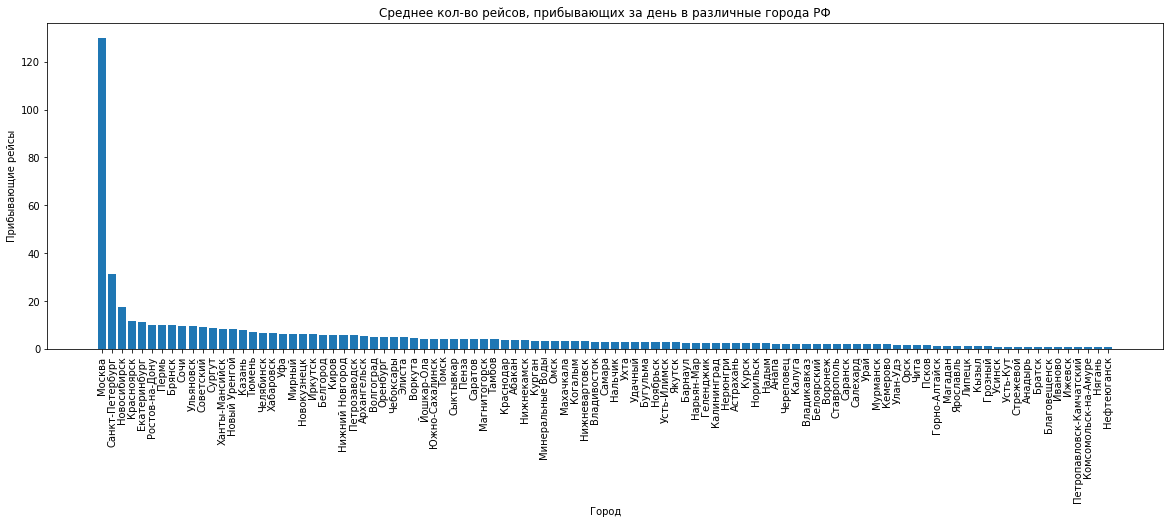

In [9]:
query_3_1 = query_3.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(20,6))
plt.bar(query_3_1.city, query_3_1.average_flights)
plt.title('Среднее кол-во рейсов, прибывающих за день в различные города РФ')
plt.ylabel('Прибывающие рейсы')
plt.xlabel('Город')
plt.xticks(rotation=90)
plt.show()

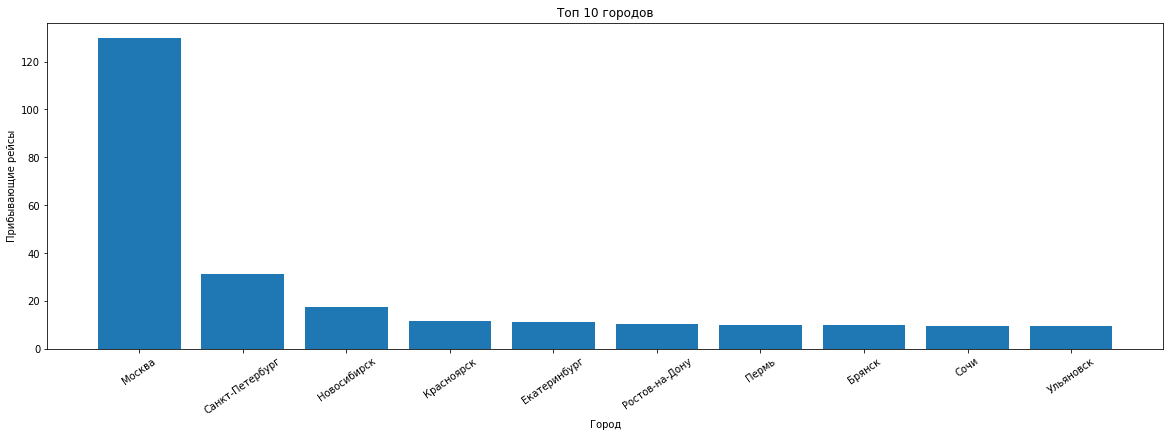

In [10]:
query_3_2 = query_3.sort_values(by='average_flights', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.bar(query_3_2.city, query_3_2.average_flights)
plt.title('Топ 10 городов')
plt.ylabel('Прибывающие рейсы')
plt.xlabel('Город')
plt.xticks(rotation=35)
plt.show()

> **Вывод:**  
  Больше всего рейсов, ожидаемо, прибывают в столицу - Москву; на втором месте Санкт-Петербург, туда прилетают почти в 4 раза меньше рейсов, далее новосибирск с ~20 рейсами за день.

# Запрос 5

Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу:
с количеством купленных за неделю билетов;
отметкой, проходил ли в эту неделю фестиваль;
название фестиваля festival_name;
номер недели week_number.
Выводите столбцы в таком порядке:  
- week_number  
- ticket_amount  
- festival_week  
- festival_name


*SQL query:*
```sql
SELECT
    EXTRACT(week FROM flights.arrival_time) AS week_number,
    COUNT(ticket_flights.flight_id) AS ticket_amount,
    festival_week,
    festival_name
FROM
    flights
    INNER JOIN airports ON airports.airport_code = flights.arrival_airport
    INNER JOIN ticket_flights USING(flight_id)
    LEFT JOIN (SELECT
                  festival_name,
                  EXTRACT(week FROM festival_date) AS festival_week
               FROM
                   festivals
               WHERE
                       festival_date::date BETWEEN '2018-07-23' AND '2018-09-30' 
                       AND festival_city = 'Москва') AS SUBQ ON festival_week = EXTRACT(week FROM flights.arrival_time)
WHERE
    flights.arrival_time::date BETWEEN '2018-07-23' AND '2018-09-30'
    AND airports.city = 'Москва'
GROUP BY
    week_number, festival_week, festival_name
ORDER BY
    week_number
```